In [14]:
import os

import cv2
import numpy as np
import pandas as pd

from utils.pre_processing import *
from utils.detect_spines import *
from utils.utils import *
from utils.text_detection import *

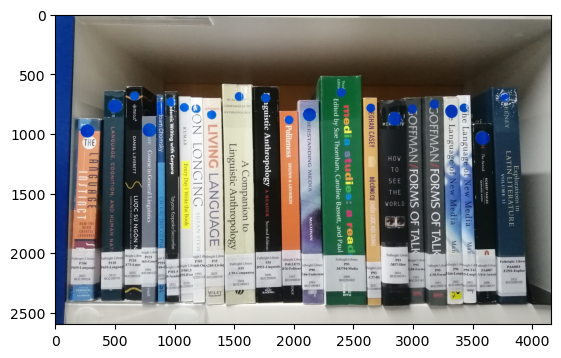

In [2]:
img_path = 'image/fulbright-lib-1.jpg'
img, img_RGB, img_hsv, img_gray = load_img(img_path)
plt.imshow(img_RGB)

Number of lines detected: 1599


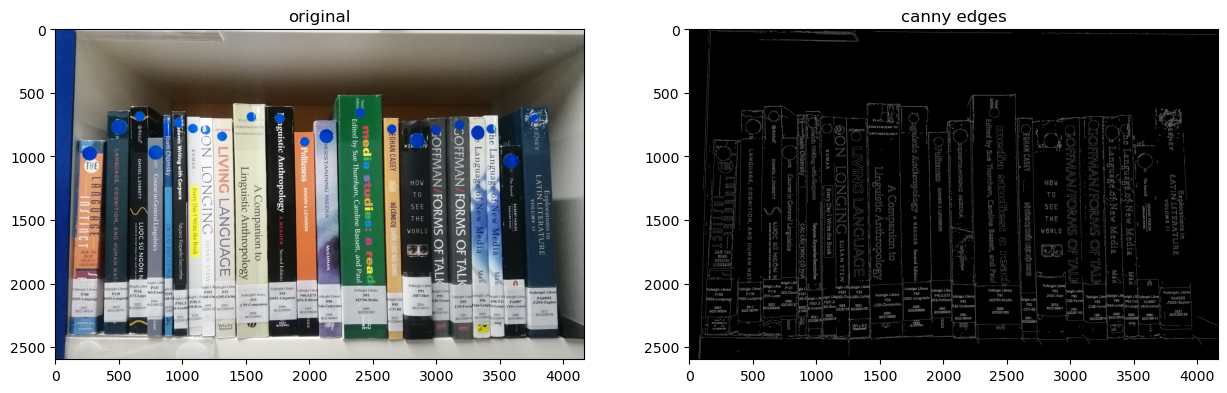

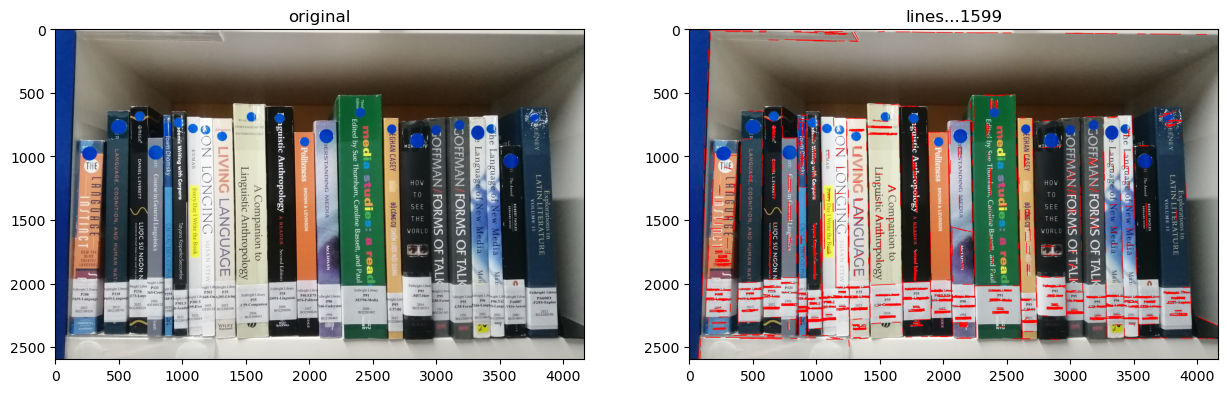

In [3]:
# Let's try some common methods

img_blur = cv2.GaussianBlur(img, (3,3), 0)
canny_edges = cv2.Canny(img_blur, 50,100)
display_plt(img_RGB, canny_edges, 'original', 'canny edges')

linesP = cv2.HoughLinesP(canny_edges, 1, np.pi / 180, 50, None, 50, 10)
print(f"Number of lines detected: {len(linesP)}")
cdstP = img_RGB.copy()
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3, cv2.LINE_AA)
display_plt(img_RGB, cdstP, 'original', f'lines...{len(linesP)}')


does not work well, then we have to design something original to solve this problem

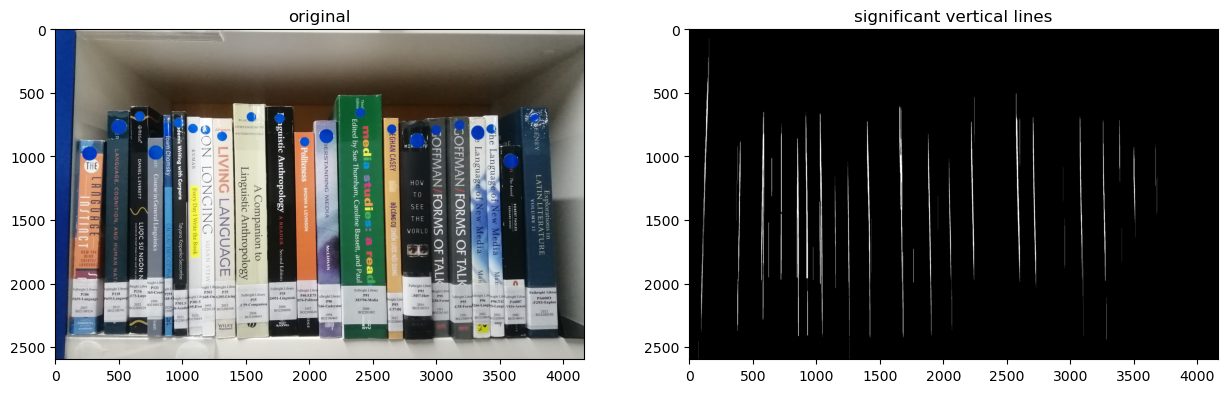

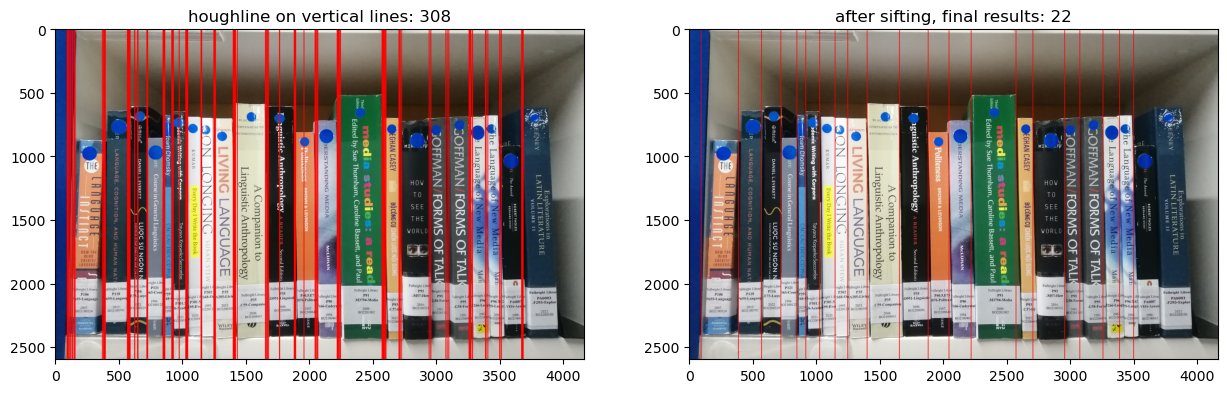

In [4]:
## my proposed algorithm

vertical_lines = get_vertical_lines(img_gray, min_vertical=0.1)
linesP = houghlines(vertical_lines)
houghline_draw = draw_dividers(img_RGB, linesP)

dividers = get_divider_lines(img, linesP)
divider_draw = draw_dividers(img_RGB, dividers)

display_plt(img_RGB, vertical_lines, 'original', 'significant vertical lines')
display_plt(houghline_draw, divider_draw, 
            f'houghline on vertical lines: {len(linesP)}', 
            f'after sifting, final results: {len(dividers)}')

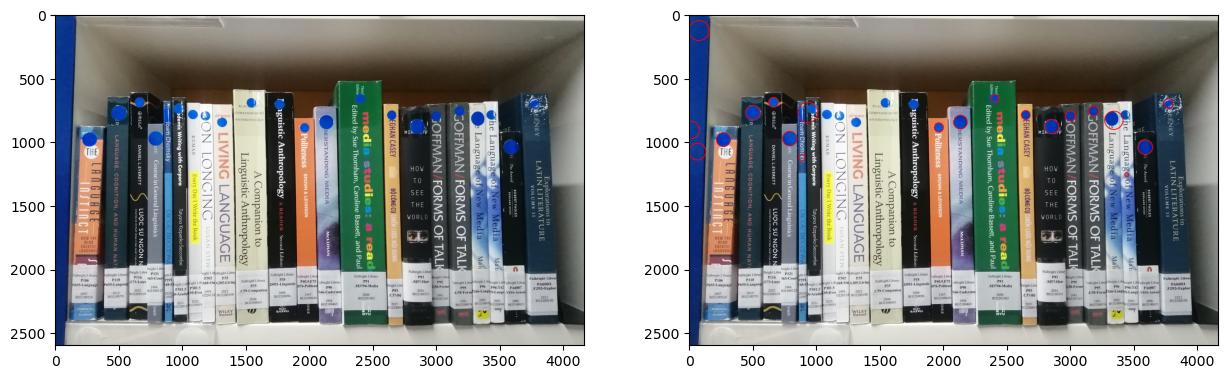

In [11]:
circles = blue_circles(img_RGB, img_hsv)

In [5]:
spines = get_book_spines(img, dividers)
spine_loc = get_spine_loc(img, dividers)
export_spine_img(os.getcwd(),img_path, spines)

great, now we have individual book spine. Next, we wish to detect texts (tilte) on those book spines. Then run an algorithm to find the best match. I used `easyocr` as the library to detect texts on images. Why?

In [6]:
text_recog(img, spine_loc, method='easyorc')
spine_loc = spine_loc.dropna()
spine_loc.head()

Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with

,x1,x2,text
1,95,388,u
2,388,570,r language; cognition; and human nat i
3,570,722,omegat daniel l.everett luoc su ngon n i j
4,722,848,urc course in general linguistics e j
5,848,918,toam chomsky cac cau truc cu pha


Okay, now we want to test our program. Find some books huh

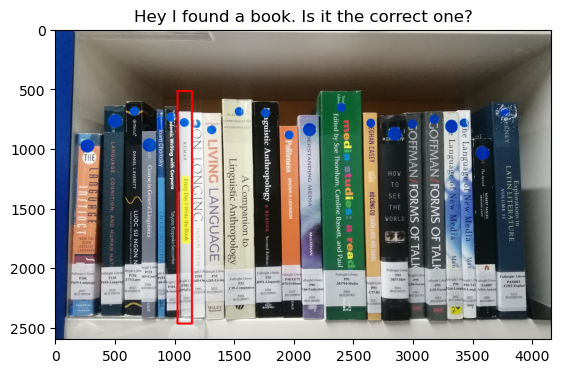

In [22]:
query = 'how to see the world'
best_match = matching(query, spine_loc)

if best_match is None:
    print("We cannot find your book.")
else:
    result = drawing_roi(img_RGB, best_match, ipynb=True)
    plt.title('Hey I found a book. Is it the correct one?')
    plt.imshow(result)